In [77]:
# IMPORTER
import torch
import numpy as np
from sklearn.model_selection import *
from torch.utils.data import *
from torch import optim, nn
import matplotlib.pyplot as plt

In [78]:
# SAMPLE DATA
X = np.random.rand(500, 4)
y = np.random.rand(500, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400, 3), (100, 3))

In [79]:
# DATASET & LOADER

X_train = torch.FloatTensor(X_train).to('mps')
X_test = torch.FloatTensor(X_test).to('mps')
y_train = torch.FloatTensor(y_train).to('mps')
y_test = torch.FloatTensor(y_test).to('mps')

train_set = TensorDataset(X_train, y_train)
test_set = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32)

In [80]:
# MODELING

model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.Sigmoid(),
)

model

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

In [81]:
# CRITERION

criterion = nn.MSELoss() # for Linear -> regression
# criterion = nn.NLLLoss() # for logsoftmax -> multiclass clf
# criterion = nn.BCELoss() # for sigmoid -> binary and multilabel clf

In [82]:
# OPTIMIZER

optimizer = optim.AdamW(model.parameters())

In [83]:
# TRAIN LOOP

epochs = 500
train_cost = []
model.to('mps')
model.train()
for epoch in range(epochs):
    cost = 0
    for x, y in train_loader:
        # 1 feed forward
        y_pred = model(x)
        
        # 2 compute loss
        loss = criterion(y_pred, y)
        
        # 4 backpropagation
        loss.backward()
        
        # 5 update weight
        optimizer.step()
        
        # 6 reset optimizer
        optimizer.zero_grad()
        
        # 7 Calculate cost
        cost += loss.item() * x.shape[0]
    train_cost.append(cost/len(train_set))
    print(f"\rEpoch: {epoch+1}/{epochs} | {train_cost[-1]:.4f}",end=" ")
        

Epoch: 500/500 | 0.0782 

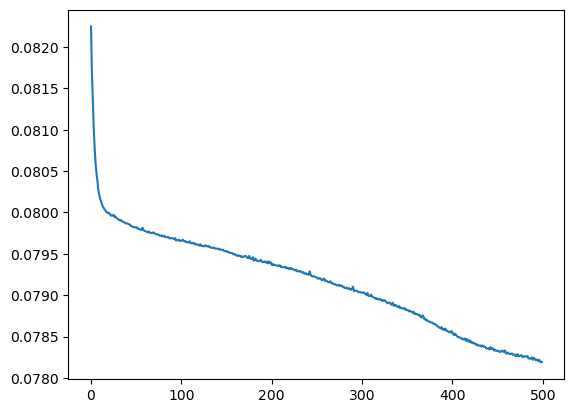

In [84]:
# PLOT COST
plt.plot(train_cost)